In [3]:
from sklearn import datasets #импортируем данные из библиотеки для работы 

In [4]:
data = datasets.load_iris() #присваиваем имя переменной из выпадающего списка кучи всякого там

In [5]:
print(data['data'].shape) #узнаем формат и размер используемых данных

(150, 4)


In [6]:
import pandas as pd # импортируем библиотеку анализа данных

In [7]:
x = pd.DataFrame(data['data'], columns = data['feature_names']) # создаем датафрейм по
#ключу и задаем имена колонкам датафрейму также по ключам

In [8]:
x # глянем, чего там есть

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y = pd.DataFrame(data['target'], columns = ('species',))
y # задали и вывели еще один датафрейм с другими свойствами и итератором

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [10]:
def f(i):
    return data['target_names'][i] # заменяем численные значения на названия, содержащиеся по ключу в датасете
y.apply(f)

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [11]:
x.describe() # смотрим статистику по данным

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
import seaborn as sns # импортируем библиотеку-надстройку над матплотлиб для последующего построения 
# попарных графиков

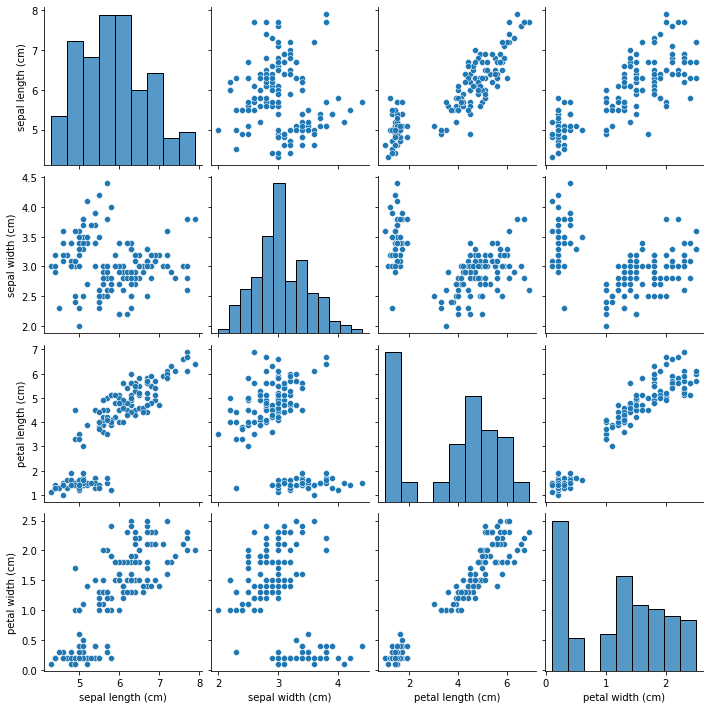

In [13]:
sns.pairplot(x) #построили попарный график для датафрейма, графики построены по признакам, а не классам

In [14]:
data1 = pd.concat((x, y.apply(f)), axis=1) # соединяем вместе два датафрейма и убираем ось признаков, чтобы отображение 
#было по оси цветов

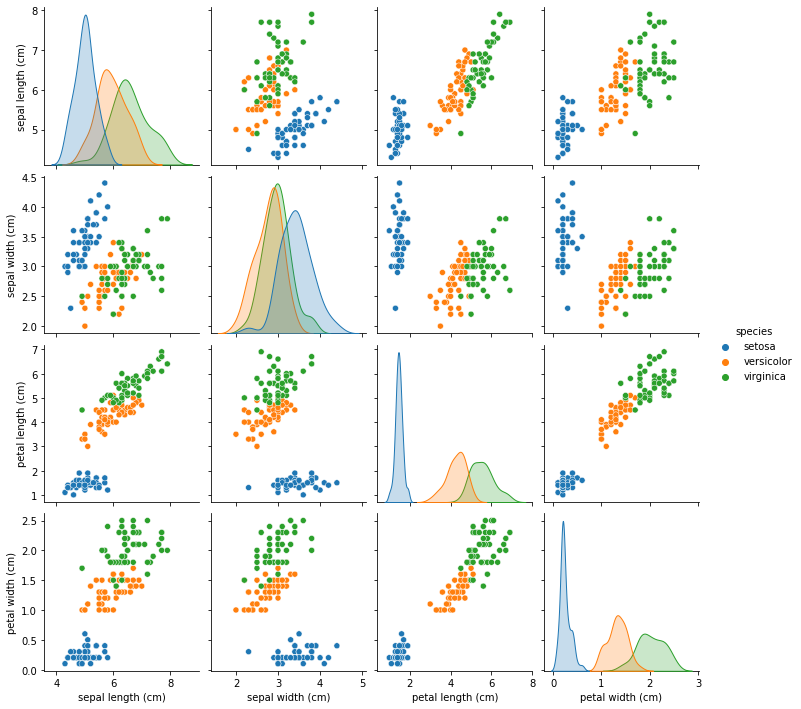

In [16]:
sns.pairplot(data1, hue='species') #строим попарный график для объединенного датафрейма с 
                                  #разделителем по критерию названия цветка

In [18]:
x.corr() # построим матрицу корреляции

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

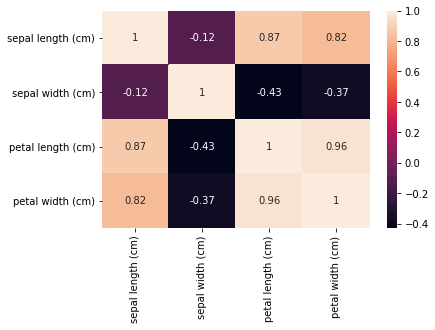

In [22]:
sns.heatmap(x.corr(), annot = True) # представим матрицу корреляции графически

In [58]:
from sklearn.linear_model import SGDClassifier # стохастический градиентный спуск
clf = SGDClassifier(max_iter=1000, tol=1e-5) # в классификаторе
                                             #задаем количество итераций, функцию потерь или условие остановки

In [59]:
from sklearn.model_selection import train_test_split # делим все данные на тренировочные и контрольные
x_train, x_test, y_train, y_test = train_test_split(x, y) #определим названия тренировочных и тестовых массивов

In [60]:
clf.fit(x_train, y_train) #подгон модели по параметрам

c:\users\funky\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDClassifier(tol=1e-05)

In [61]:
pred = clf.predict(x_test) # предсказывание
y_test['species'] == pred


101     True
2       True
48      True
133     True
100     True
17      True
124     True
53      True
49      True
95      True
89      True
116     True
73      True
76      True
3       True
44      True
111     True
118     True
52      True
107     True
51      True
21      True
47      True
102     True
141     True
45      True
65      True
71      True
70     False
4       True
134     True
94      True
41      True
129     True
96      True
104     True
117     True
23      True
Name: species, dtype: bool

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9736842105263158